In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('flats_cleaned_v4.csv')

In [4]:
df.head()

,society,price,place,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Direction,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,simoco sanhita housing complex,0.27,bhangar,3857.0,700.0,Super Built up area 916(85.1 sq.m.)Carpet area...,3.0,2,1,2,NaN,New Property,West,916.0,NaN,700.0,0,0,0,0,0,0,100.0
1,team taurus kabya,0.52,rajarhat,3729.0,1394.0,Super Built up area 1287(119.57 sq.m.),3.0,2,2,2,NaN,New Property,East,1287.0,NaN,NaN,0,0,0,0,0,0,43.0
2,"shovanalaya, joramandir",0.22,baguiati,3577.0,615.0,Super Built up area 715(66.43 sq.m.)Carpet are...,2.0,2,1,0,West,Old Property,East,715.0,NaN,615.0,0,0,0,0,1,0,6.0
3,maa sarada apartment bangur,0.38,bangur,4750.0,800.0,Super Built up area 800(74.32 sq.m.),2.0,2,1,3,South,Moderately Old,North,800.0,NaN,NaN,0,0,0,0,0,0,20.0
4,chandroprova apartments,0.55,garia,8333.0,660.0,Super Built up area 880(81.75 sq.m.)Carpet are...,2.0,2,1,3,South,Old Property,South,880.0,NaN,660.0,0,0,0,0,0,2,13.0


In [5]:
df.isnull().sum()

society                  0
price                    0
place                    0
price_per_sqft           0
area                     0
areaWithType             0
bedRoom                  0
bathroom                 0
balcony                  0
floorNum                 0
facing                  99
agePossession            0
Direction                0
super_built_up_area      0
built_up_area          984
carpet_area            908
study room               0
servant room             0
store room               0
pooja room               0
others                   0
furnishing_type          0
luxury_score             1
dtype: int64

# Built up area Imputation

There could be 3 possibilities

*   All 3 types of area are present
*   super_built_up_area and built_up_area are present
*   carpet_area and built_up_area are present





<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

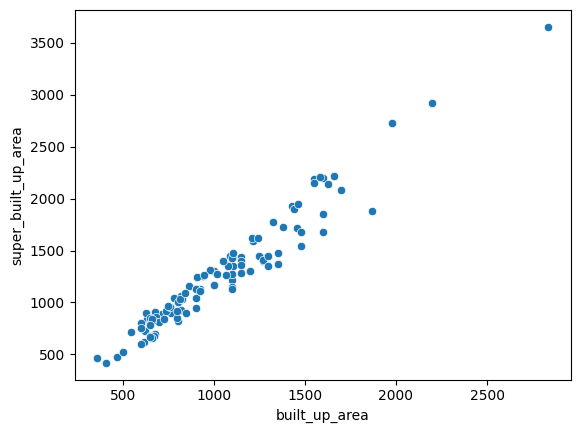

In [6]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

We can see a strong correlation between built_up_area and super_built_up_area. We can use this relation to fill the missing values in built_up_area.

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

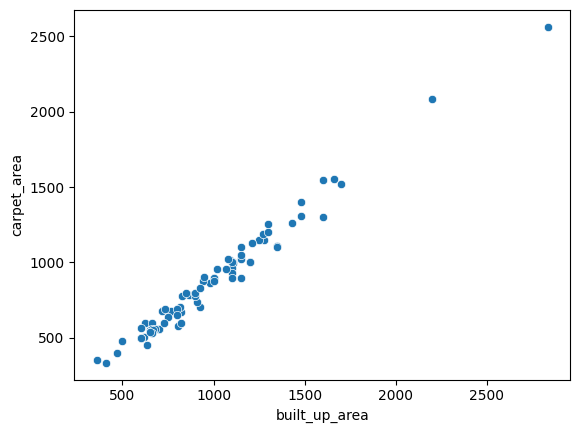

In [7]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

We can see a strong correlation between built_up_area and carpet_area. We can use this relation to fill the missing values in carpet_area.

In [8]:
#check is there any rows where nothing is given
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())).value_counts()

False    1102
dtype: int64

We can see there is no such points, where no area is given

In [9]:
#extracting where all 3 are available
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [10]:
all_present_df.shape

(79, 23)

In [11]:
#calculating two ratios from this dataframe

super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

print(super_to_built_up_ratio, ',' ,carpet_to_built_up_ratio)

1.169 , 0.8851351351351351


## Imputation with 'super_built_up_area' and 'carpet_area' data

In [12]:
# extracting where above two are present but built up area is null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [13]:
#filling those missing values with first diving both coloumns with there mean, then adding, taking avarage
sbc_df['built_up_area'].fillna(round((
    (sbc_df['super_built_up_area']/super_to_built_up_ratio)
    + (sbc_df['carpet_area']/carpet_to_built_up_ratio))/2),
                               inplace=True)

<ipython-input-13-075556a65bed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round((


In [14]:
df.update(sbc_df)

In [15]:
df.isnull().sum()

society                  0
price                    0
place                    0
price_per_sqft           0
area                     0
areaWithType             0
bedRoom                  0
bathroom                 0
balcony                  0
floorNum                 0
facing                  99
agePossession            0
Direction                0
super_built_up_area      0
built_up_area          869
carpet_area            908
study room               0
servant room             0
store room               0
pooja room               0
others                   0
furnishing_type          0
luxury_score             1
dtype: int64

## Imputation with using 'super_built_up_area' data

In [16]:
# extracting where super_built_up_area is present but carpet_area and built_up_area is null
# we will impute built_up_area null values by using corresponding super_built_up_area data

sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [17]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/super_to_built_up_ratio),inplace=True)

<ipython-input-17-49a9d72ea48a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/super_to_built_up_ratio),inplace=True)


In [18]:
df.update(sb_df)

In [19]:
df.isnull().sum()

society                  0
price                    0
place                    0
price_per_sqft           0
area                     0
areaWithType             0
bedRoom                  0
bathroom                 0
balcony                  0
floorNum                 0
facing                  99
agePossession            0
Direction                0
super_built_up_area      0
built_up_area            0
carpet_area            908
study room               0
servant room             0
store room               0
pooja room               0
others                   0
furnishing_type          0
luxury_score             1
dtype: int64

Now, we do not have missing values in built_up_area. GREAT !!!

<Axes: xlabel='built_up_area', ylabel='price'>

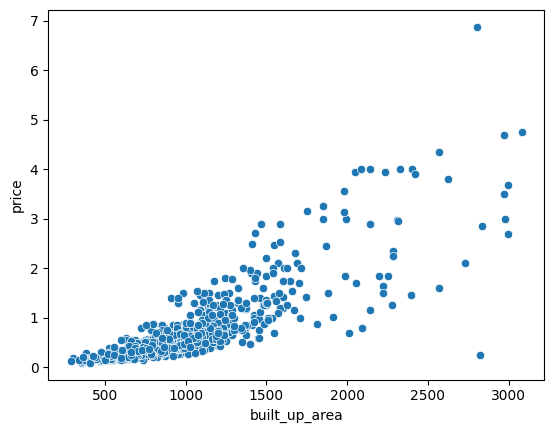

In [20]:
#plotting scatterplot to see for any discrepency
sns.scatterplot(x= df['built_up_area'],y=df['price'])

So, all the data are following a linear trend. As area increases, price also increases.

In [21]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'],inplace=True)

In [22]:
df.head()

,society,price,place,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Direction,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,simoco sanhita housing complex,0.27,bhangar,3857.0,3.0,2.0,1,2.0,NaN,New Property,West,787.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
1,team taurus kabya,0.52,rajarhat,3729.0,3.0,2.0,2,2.0,NaN,New Property,East,1101.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0
2,"shovanalaya, joramandir",0.22,baguiati,3577.0,2.0,2.0,1,0.0,West,Old Property,East,653.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0
3,maa sarada apartment bangur,0.38,bangur,4750.0,2.0,2.0,1,3.0,South,Moderately Old,North,684.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
4,chandroprova apartments,0.55,garia,8333.0,2.0,2.0,1,3.0,South,Old Property,South,749.0,0.0,0.0,0.0,0.0,0.0,2.0,13.0


In [23]:
df.isnull().sum()

society             0
price               0
place               0
price_per_sqft      0
bedRoom             0
bathroom            0
balcony             0
floorNum            0
facing             99
agePossession       0
Direction           0
built_up_area       0
study room          0
servant room        0
store room          0
pooja room          0
others              0
furnishing_type     0
luxury_score        1
dtype: int64

# facing

<Axes: ylabel='facing'>

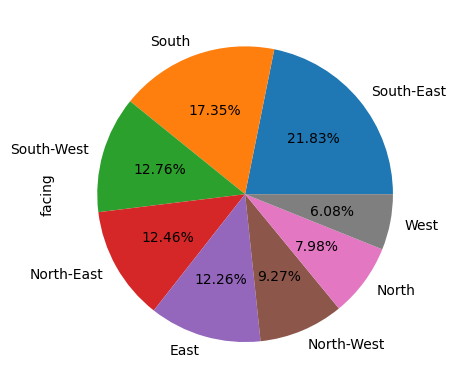

In [24]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [25]:
df['facing'].isnull().sum()

99

In [26]:
df.shape

(1102, 19)

In [27]:
# percentage of missing value in facing column. There are 99 values missing
99/df.shape[0]

0.08983666061705989

In [28]:
df_missing_values = df[df['facing'].isnull()]

In [29]:
df_missing_values

,society,price,place,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Direction,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,simoco sanhita housing complex,0.27,bhangar,3857.0,3.0,2.0,1,2.0,NaN,New Property,West,787.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
1,team taurus kabya,0.52,rajarhat,3729.0,3.0,2.0,2,2.0,NaN,New Property,East,1101.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0
8,sugam serenity,0.40,sonarpur,4285.0,2.0,2.0,1,1.0,NaN,Relatively New,South,838.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0
10,mani vista,2.72,tollygunge,21570.0,3.0,3.0,1,28.0,NaN,New Property,South,1432.0,0.0,1.0,0.0,0.0,0.0,0.0,35.0
12,primarc southwinds,0.72,em bypass,6521.0,3.0,2.0,1,1.0,NaN,New Property,South,984.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,suman apartment,0.40,ganguly bagan,3937.0,2.0,2.0,0,2.0,NaN,Relatively New,South,869.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
1091,the orchid grandeur,1.25,rajarhat,5000.0,3.0,3.0,3,2.0,NaN,New Property,East,2278.0,1.0,1.0,0.0,0.0,0.0,0.0,49.0
1095,siddha waterfront,0.32,khardah,3883.0,2.0,2.0,1,9.0,NaN,New Property,North,705.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1097,eden city maheshtala,0.28,maheshtala,2265.0,3.0,2.0,1,5.0,NaN,Moderately Old,South,1057.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#delete those rows where values are missing
df.dropna(subset=['facing'], inplace=True)

<Axes: xlabel='built_up_area', ylabel='price'>

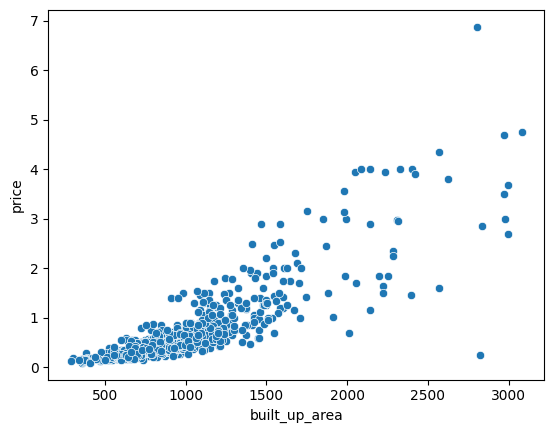

In [31]:
sns.scatterplot(x= df['built_up_area'],y=df['price'])

In [32]:
df.shape

(1003, 19)

In [33]:
df.isnull().sum()

society            0
price              0
place              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
facing             0
agePossession      0
Direction          0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       1
dtype: int64

# luxury_score

In [34]:
df[df['luxury_score'].isnull()]

,society,price,place,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Direction,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1101,"basudev angan, utterpara",0.4,bhadrakali,3500.0,2.0,2.0,1,2.0,South,Old Property,West,1030.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN


In [35]:
df.drop(index=[1101],inplace=True)

In [36]:
df.isnull().sum()

society            0
price              0
place              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
facing             0
agePossession      0
Direction          0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

# agePossession

In [37]:
#This column has 'undefined' value, which we gave earlier
df['agePossession'].value_counts()

Relatively New        649
New Property          131
Moderately Old        123
Old Property           92
Under Construction      5
Undefined               2
Name: agePossession, dtype: int64

In [38]:
df[df['agePossession'] == 'Undefined']

,society,price,place,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Direction,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1063,bijoya apartment,0.33,santoshpur,5116.0,2.0,1.0,0,1.0,South,Undefined,West,558.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0
1090,rainbow residency,0.27,kudghat,3174.0,2.0,2.0,0,4.0,South-West,Undefined,West,787.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0


In [39]:
#to fill these values, we will see for the 'place' column, then take mode (most frequent value)
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[df['place'] == row['place']]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [40]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [41]:
df['agePossession'].value_counts()

Relatively New        650
New Property          131
Moderately Old        124
Old Property           92
Under Construction      5
Name: agePossession, dtype: int64

In [42]:
df.isnull().sum()

society            0
price              0
place              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
facing             0
agePossession      0
Direction          0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [43]:
df.to_csv('flats_cleaned_v5.csv',index=False)

In [44]:
df.shape

(1002, 19)